In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# ## Improvements
#     * Apply this to elo dataset - done
#     * Visualization April - Techniques discussion - superset(presnet), tableau(if interested), power BI - super set is having problems
#     * Think dataset which I am interesed in! Get Data! -  wait for data - for wht i am interested 
#     * Explore feature generation - 
#     * Learn about proper project structure

In [3]:
## imports
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

sys.path.insert(0, "../")
from utility import converter, exporter, missing

In [4]:
########
########
########
########
######## CHANGE DETAILS ON THE FOLLOWING CELL
########
########
########
########

In [5]:
## change contents of this cell for loading files
FILE_NAME = "../data/new_merchant_transactions.npy"
FILE_FORMAT = "numpy"

In [6]:
data = exporter.load_file(FILE_NAME, FILE_FORMAT)

In [7]:
data.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557617,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569336,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551270,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671875,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659668,2018-03-22 21:07:53,NaN,-1,29


### Extract Numerical and Categorical Variables

In [8]:
types = exporter.dataframe_dtypes(data)
types

,datatype
authorized_flag,object
card_id,object
category_1,object
category_2,float16
category_3,object
city_id,int16
installments,int16
merchant_category_id,int16
merchant_id,object
month_lag,int8


In [9]:
numerical_types=[]
categorical_types=[]
string_types=[]
datetime_type=[]

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_categorical_dtype, is_datetime64_any_dtype

for col in types.reset_index()["index"]:
#     print(col)
    if(is_string_dtype(data[col])):
        string_types.append(col)
    elif(is_numeric_dtype(data[col])):
        numerical_types.append(col)
    elif(is_categorical_dtype(data[col])):
        categorical_types.append(col)
    elif(is_datetime64_any_dtype(data[col])):
        datetime_type.append(col)

In [10]:
numerical_types

['category_2',
 'city_id',
 'installments',
 'merchant_category_id',
 'month_lag',
 'purchase_amount',
 'state_id',
 'subsector_id']

In [11]:
categorical_types

[]

In [12]:
string_types

['authorized_flag', 'card_id', 'category_1', 'category_3', 'merchant_id']

In [14]:
datetime_type

['purchase_date']

### Univariate Plots

#### Numerical Types - Histograms

In [15]:
interactive = False

category_2


ValueError: cannot convert float NaN to integer

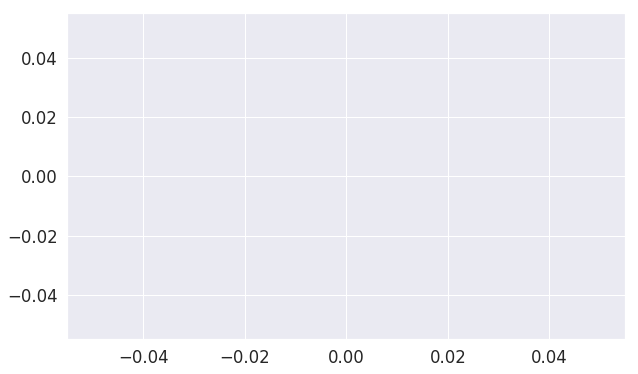

In [17]:
if( interactive is False):
    for col in numerical_types:
        print(col)
        plt.figure(figsize=(10,6))
        sns.distplot(data[col])
        plt.show()
else:
    for col in numerical_types:
        @interact
        def show_histogram(bins = widgets.IntSlider(min=3,max=30,step=1,value=3)
                          ):
    #     def show_histogram(bins=(5,100, 5)):
            plt.figure(figsize=(10,6))
            sns.distplot(data[col], bins=bins)
            plt.show()

#### Correlation Matrix

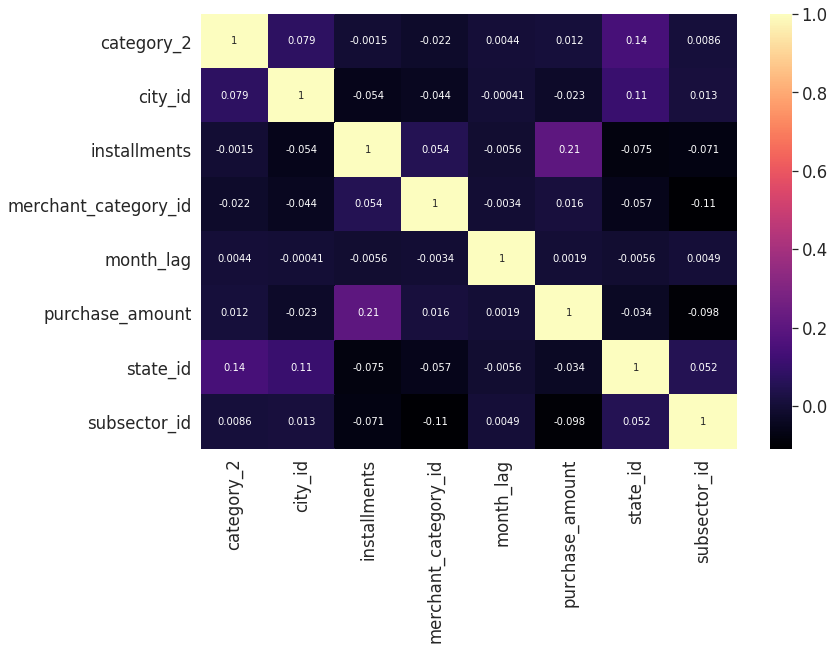

In [18]:
import seaborn as sns
plt.style.use('seaborn-deep')
if(len(numerical_types)>=2):
    corr = data[numerical_types].corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(corr,annot=True, cmap=plt.get_cmap('magma'))

### Categorical Types

#### Countplot

In [19]:
for col in categorical_types:
    number_distinct = np.unique(data[col]).shape[0]
    if(number_distinct > 100):
        print("skipping {} column with {} distinct values".format(col, number_distinct))
    else:
        plt.figure(figsize=(12,(number_distinct/5)+8))
        sns.countplot(y=col, data=data)
        plt.show()
    

In [21]:
for col in datetime_type:
    number_distinct = np.unique(data[col]).shape[0]
    if(number_distinct > 100):
        print("skipping {} column with {} distinct values".format(col, number_distinct))
    else:
        plt.figure(figsize=(12,(number_distinct/5)+8))
        sns.countplot(y=col, data=data)
        plt.show()
    

skipping purchase_date column with 1667025 distinct values


### Bivariate Plots

In [22]:
########
########
########
########
######## CHANGE DETAILS ON THE FOLLOWING CELL
########
########
########
########

In [24]:
TARGET_COLUMN = "purchase_amount"
TARGET_TYPE="regression" # regression, classification

In [25]:
if(TARGET_TYPE=='regression'):
    @interact
    def scatter_plot(x=numerical_types, 
                     y=TARGET_COLUMN):

        sns.set_style("darkgrid")
        plt.figure(figsize=(14,12))
        sns.scatterplot(data[x], data[y])
        plt.show()

interactive(children=(Dropdown(description='x', options=('category_2', 'city_id', 'installments', 'merchant_category_id', 'month_lag', 'purchase_amount', 'state_id', 'subsector_id'), value='category_2'), Text(value='purchase_amount', description='y'), Output()), _dom_classes=('widget-interact',))

In [26]:
if(TARGET_TYPE=='regression'):
    @interact
    def scatter_plot(group=categorical_types, 
                     y=TARGET_COLUMN):
        number_distinct = np.unique(data[group]).shape[0]
        if(number_distinct > 100):
            print("skipping {} column with {} distinct values".format(group, number_distinct))
        else:
            plt.figure(figsize=(12,(number_distinct/5)+8))
            sns.set_style("darkgrid")
            sns.boxplot(y = data[group], x = data[y])
            
            # Tukeys's test to find the differnt groups
            mod = pairwise_tukeyhsd(data[y], data[group])
            plt.show()
#             print (mod)

            
            

interactive(children=(Dropdown(description='group', options=(), value=None), Text(value='purchase_amount', description='y'), Output()), _dom_classes=('widget-interact',))